# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
import csv
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Locking in a Random Seed
random.seed(30)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
print(cities)

['tukrah', 'russell', 'milkovo', 'roanne', 'thompson', 'hambantota', 'churapcha', 'rikitea', 'mataura', 'castro', 'lagoa', 'victoria', 'ormara', 'jamestown', 'souillac', 'tuktoyaktuk', 'busselton', 'kidal', 'ostrovnoy', 'saint anthony', 'husavik', 'sao joao da barra', 'upernavik', 'barrow', 'kaitangata', 'kapaa', 'the valley', 'morrope', 'nikolskoye', 'ushuaia', 'linkoping', 'kutum', 'cururupu', 'douglas', 'fairmont', 'hirara', 'hermanus', 'butaritari', 'brae', 'norilsk', 'punta arenas', 'maraa', 'abu jubayhah', 'makakilo city', 'zhigansk', 'pevek', 'khatanga', 'chernyshevskiy', 'matata', 'albany', 'luderitz', 'puerto ayora', 'clarksburg', 'ostroleka', 'tura', 'mbini', 'piryion', 'vestmannaeyjar', 'constitucion', 'aginskoye', 'saint george', 'bredasdorp', 'vaini', 'bluff', 'coahuayana', 'juneau', 'yellowknife', 'hobart', 'chapais', 'qaanaaq', 'esperance', 'rio grande', 'dikson', 'namatanai', 'upata', 'getulio vargas', 'georgetown', 'lebu', 'grindavik', 'shirokiy', 'skagastrond', 'bikin

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Identify the URL and the query url
url = "https://api.openweathermap.org/data/2.5/weather?q="


In [7]:

# Empty lists to group data
city_name = []
Lat = []
Long = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

# Begin for loop, append relevant data and print log
print("Beginning Data Retrieval")
print("-"*30)
for city in cities:
    try:
        response = requests.get(url + city+'&appid='+weather_api_key).json()
        print("Processing record |" + city)
        city_name.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Long.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
    except:
        print(city + " not found. Skipping...")
print("-"*30)
print("Ending Data Retrieval")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing record |tukrah
Processing record |russell
Processing record |milkovo
Processing record |roanne
Processing record |thompson
Processing record |hambantota
Processing record |churapcha
Processing record |rikitea
Processing record |mataura
Processing record |castro
Processing record |lagoa
Processing record |victoria
Processing record |ormara
Processing record |jamestown
Processing record |souillac
Processing record |tuktoyaktuk
Processing record |busselton
Processing record |kidal
Processing record |ostrovnoy
Processing record |saint anthony
Processing record |husavik
Processing record |sao joao da barra
Processing record |upernavik
Processing record |barrow
Processing record |kaitangata
Processing record |kapaa
Processing record |the valley
Processing record |morrope
Processing record |nikolskoye
Processing record |ushuaia
Processing record |linkoping
Processing record |kutum
Processing record |cururupu
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Gather the data and convert into a dataframe
cities_dict = ({
    "City Name":city_name,
    "Latitude":Lat,
    "Longtitude":Long,
    "Max Temperature":Max_Temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Country":Country,
    "Date":Date
})

cities_df=pd.DataFrame(cities_dict)
cities_df.head()

,City Name,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tūkrah,32.5341,20.5791,300.71,40,0,2.22,LY,1663318021
1,Russell,32.3502,-85.1999,292.72,100,0,0.00,US,1663317979
2,Mil'kovo,54.7167,158.6167,278.07,87,42,3.25,RU,1663318022
3,Arrondissement de Roanne,46.0000,4.0000,286.45,87,44,2.81,FR,1663318022
4,Thompson,55.7435,-97.8558,277.24,100,0,0.00,CA,1663318023


In [13]:
# Confirm output file and export data into a csv
output_csv='output_data/cities.csv'

cities_df.to_csv(output_csv,header=True,index=False)
cities_df.describe()

,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.784949,20.284108,292.795996,70.597884,55.156966,3.752310,1.663318e+09
std,33.073343,90.374161,9.001025,21.896493,40.429999,2.496215,1.210977e+02
min,-54.800000,-175.200000,270.350000,9.000000,0.000000,0.000000,1.663317e+09
25%,-6.990900,-59.126750,285.305000,61.000000,13.000000,1.840000,1.663318e+09
50%,21.650000,23.889900,294.340000,76.000000,64.000000,3.130000,1.663318e+09
75%,47.887850,99.752850,300.125000,86.500000,100.000000,5.220000,1.663318e+09
max,78.218600,179.316700,313.300000,100.000000,100.000000,13.380000,1.663318e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [24]:
#Confirming no cities have humidity over 100%.
humidity_over_100 = cities_df.loc[cities_df["Humidity"] < 100]
humidity_over_100

,City Name,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tūkrah,32.5341,20.5791,300.71,40,0,2.22,LY,1663318021
2,Mil'kovo,54.7167,158.6167,278.07,87,42,3.25,RU,1663318022
3,Arrondissement de Roanne,46.0000,4.0000,286.45,87,44,2.81,FR,1663318022
5,Hambantota,6.1241,81.1185,308.34,55,20,6.17,LK,1663318023
6,Churapcha,62.0025,132.4325,278.33,57,11,2.08,RU,1663318023
...,...,...,...,...,...,...,...,...,...
560,Kirando,-7.4167,30.6000,301.45,44,38,4.12,TZ,1663318147
561,Kipushi,-11.7667,27.2333,299.83,30,89,3.53,CD,1663318200
563,Mersing,2.4312,103.8405,305.10,70,40,3.60,MY,1663318200
564,Quito,-0.2299,-78.5249,282.68,82,97,1.02,EC,1663317791


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

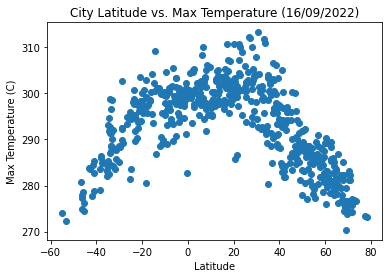

In [26]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temperature"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (16/09/2022)");
plt.savefig("output_data/Img01")

The above scatter plot indicates that as cities get closer to the equator, where Latitude is 0, the Cities' Max Temperature is going to be hotter than cities further away from the equator. Additionally, it shows that for the date that the data was requested it was Summer in the Northern Hemispher as overall the cities above the Equator, where Latitude is greater than 0, are generally higher than the temperature of the cities below the Equator.

## Latitude vs. Humidity Plot

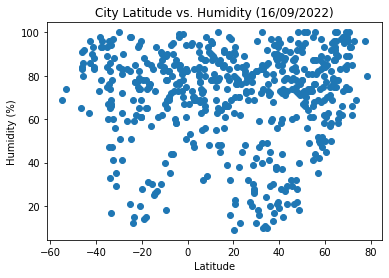

In [28]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (16/09/2022)");
plt.savefig("output_data/Img02")

This scatter plot is analysing whether there is a relationship between the humidity of a city to its latitude. It seems that overall the sample cities have a humidity over 40% on the day the data is pulled.

## Latitude vs. Cloudiness Plot

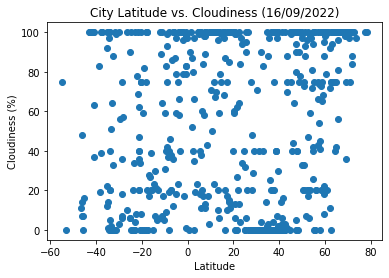

In [29]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (16/09/2022)");
plt.savefig("output_data/Img03")

In this scatter plot the Cloudiness of the sample city is being plotted against the cities' Latitude. It seems that the Cloudiness is not correlated to the Latitude of the city.

## Latitude vs. Wind Speed Plot

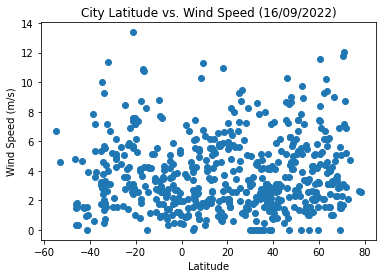

In [30]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (16/09/2022)");
plt.savefig("output_data/Img04")

Above we are plotting Wind Speed against the Latitude of the sample cities.

## Linear Regression

In [31]:
# Create two dataframes for both hemispheres
northern_hemi = cities_df.loc[cities_df["Latitude"] > 0]
southern_hemi = cities_df.loc[cities_df["Latitude"] < 0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8205954075446157


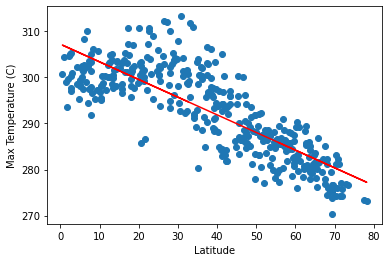

In [32]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=15,color="red")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

The above table is demonstrating the relationship between a cities Latitude and it's Max Temperature. The R-Value indicates a fairly strong relationship that the further north (a greater Latitude figure) the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.734017440728939


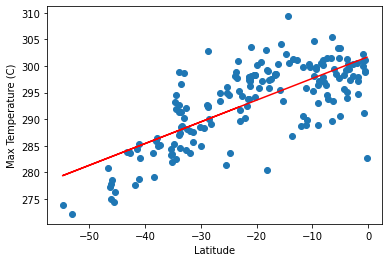

In [33]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

In comparison to the Northern Hemisphere, for the Southen Hemisphere the further south (a smaller Latitude figure) the temperature will get lower. The R-Value indicates a strong relationship between a Souther Hemisphere's city's Latitude and Max Temperature.

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11509348244784315


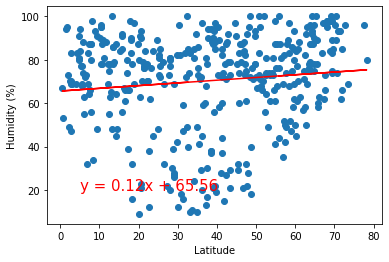

In [34]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

The above scatter plot shows a cities' Latitude to its Humidity. While there is a very slight positive linear regression the r-value is far too low to indicate a correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.05013860315570505


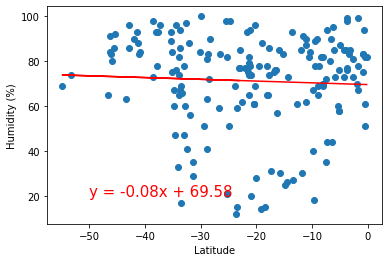

In [35]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

While the Northern Hemispher has a positive linear regression between Humidity and Latitude, the Southern Hemisphere has a negative linear regression. The r-value is greater but I believe this is due to the smaller sample size compared to the Northern Hemisphere.

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16068698581253812


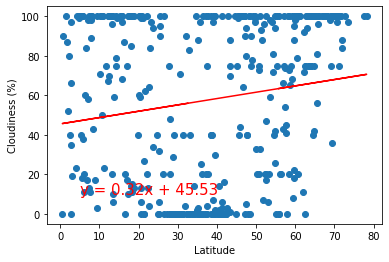

In [36]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17763178044452152


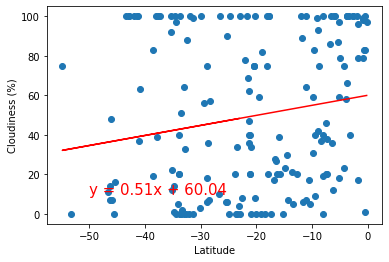

In [37]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

Both plots are plotting the relationship between a cities' Latitude and Cloudiness. In neither linear regression is there indication of a relationship between Latitude and Cloudiness.

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09728933823835104


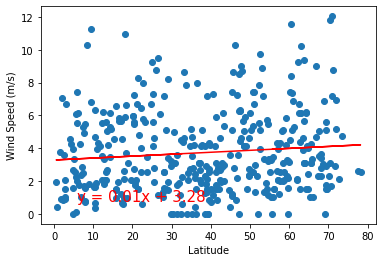

In [38]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0623109224401069


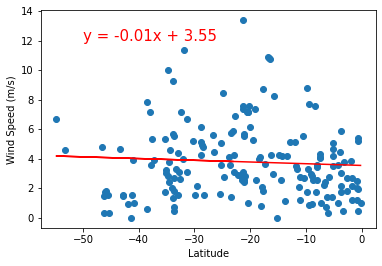

In [39]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show();